<center>
    <h1 style="font-size: 32px;">Wrangle and Analyze Data</h1>
    <h2>Abdulrahman Mohammed Alobaidy</h2>
    <h3>Cohort 9</h3>
    <h3>Data Analyst Nanodegree Program</h3>
    <h4>Email: <a href="mailto:AbdulrahmanAlobaidy2001@gmail.com">AbdulrahmanAlobaidy2001@gmail.com</a></h4>
</center>
<hr>

# Data Wrangling
---

First we import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
---

1. We read the `twitter_archive_enhanced.csv` file provided at hand.

In [2]:
df_enhanced = pd.read_csv('twitter_archive_enhanced.csv')

2. Then we request the `image_predictions.tsv` file `Requests` library, then save the data into a file, `image_predictions.tsv`, finally, we read the file into a pandas DataFrame.

In [3]:
import requests

res = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image_predictions.tsv', 'wb') as image_predictions_file:
    image_predictions_file.write(res.content)

df_image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

3. Now we read the Twitter API data from the `tweet-json.txt` file as I couldn't get access to the Twitter API, read the file line by line, parse the json string and store every json object in the `df_tweet_api_list`, then read that into a pandas DataFrame, and finally, save that DataFrame into a file named `tweet_json.csv`.

In [4]:
import json

df_tweet_api_list = list()

with open('tweet-json.txt', 'r') as tweet_api_file:
    lines = tweet_api_file.readlines()
    for line in lines:
        line = json.loads(line)
        df_tweet_api_list.append(line)
        
df_api = pd.DataFrame(df_tweet_api_list)

df_api.to_csv('tweet_json.csv', index=False)

## Data Assessment
---

### Visual Assessment
---

1. `df_enhanced`

First, let's visually assess the `df_enhanced` DataFrame.

In [5]:
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


The first thing you notice is that the `rating_denominator` column is completely redundant, that is because the value is constant and is always a **10**.


The second thing you notice is that the dog stages are distributed into four columns, (`doggo`, `floofer`, `pupper`, `puppo`), and need to be combined into a single column.

Finally, there is no rating column that calculates the result of the numerator divided by the denominator, we would need that for analysis purposes.

Now, we visually assess the `df_image_predictions` DataFrame.

In [6]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


This DataFrame seems clean.

3. `df_api`

In [7]:
df_api.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


This DataFrame seems visually fine, but a lot of the columns are collapsed, so it is needed to be further programmatically assessed.

### Programmatic Assessment
---

1. `df_enhanced`

In [8]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The `timestamp` column is of datatype `object` instead of `datatime`.

The retweets need to be removed from the dataset in order to analyze only the **WeRateDogs** tweets, thus we don't need the `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns.

One of the Key Notes mentioned that there could be a problem with the `rating_numerator` and `rating_denominator` columns.

In [9]:
df_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

We see that there are clearly wrong numbers in this field.

2. `df_image_predictions`

In [10]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. `df_api`

In [11]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

The `created_at` column is of datatype `object` instead of `datetime`.

In [12]:
df_api.possibly_sensitive.value_counts()

False    2211
Name: possibly_sensitive, dtype: int64

In [13]:
df_api.possibly_sensitive_appealable.value_counts()

False    2211
Name: possibly_sensitive_appealable, dtype: int64

Both the `possible_sensitive` as well as the `possibly_sensitive_appealable` columns are of datatype `object` where they should be `bool`.

In [14]:
df_api.lang.value_counts()

en     2336
und       7
nl        3
in        3
et        1
tl        1
ro        1
es        1
eu        1
Name: lang, dtype: int64

The `lang` column should be of datatype `category` instead of `object`.

## Assessment Results
---

### Tidiness Issues:
1. The group stages columns (`doggo`, `floofer`, `pupper`, `puppo`) need to be melted into a single column.
2. Merge all of the three DataFrames into a single master dataset.

### Quality Issues:
1. The `rating_denominator` column in `df_enhanced` is redundant.
2. Remove retweets from `df_enhanced`.
3. Remove the `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns from `df_enhanced`.
4. `timestamp` column of `df_enhanced` should be of datatype `datetime`.
5. Extract the `rating_numerator` from `text` in `df_enhanced`.
6. Convert `rating_numerator`'s datatype to `float`.
7. Remove records from `df_enhanced` with wrong `rating_numerator` values.
8. Missing `rating` column.
9. `created_at` column in `df_api` should be of datatype `datetime`.
10. `possibly_sensitive` column in `df_api` should be of datatype `bool`
11. `possibly_sensitive_appealable` column in `df_api` should be of datatype `bool`.
12. `lang` column in `df_api` should be of datatype `category`.

## Data Cleaning
---

In [15]:
df_enhanced_copy = df_enhanced.copy()
df_image_predictions_copy = df_image_predictions.copy()
df_api_copy = df_api.copy()

#### The group stages columns (`doggo`, `floofer`, `pupper`, `puppo`) need to be melted into a single column.

**Define**

Replace the `None` values in the above four columns with **NaN**s, then join all of them and put that value in a new column called `dog_stage`, then drop the four columns.

**Code**

In [16]:
df_enhanced_copy[['doggo', 'floofer', 'pupper', 'puppo']] = df_enhanced_copy[['doggo', 'floofer', 'pupper', 'puppo']].apply(
    lambda x: x.replace('None', np.nan))

In [17]:
df_enhanced_copy['dog_stage'] = df_enhanced_copy[['doggo', 'floofer', 'pupper', 'puppo']].apply(
    lambda x: ', '.join(x.dropna().astype(str))
    , axis = 1)

In [18]:
def remove_empty_strings(s):
    if s == '':
        return np.nan
    return s
df_enhanced_copy['dog_stage'] = df_enhanced_copy['dog_stage'].apply(remove_empty_strings)

In [19]:
df_enhanced_copy.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

**Test**

In [20]:
df_enhanced_copy.dog_stage.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

In [21]:
df_enhanced_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

#### The `rating_denominator` column in `df_enhanced` is redundant.

**Define**

Drop the `rating_denominator` column in `df_enhanced_copy`.

**Code**

In [22]:
df_enhanced_copy.drop('rating_denominator', axis=1, inplace=True)

**Test**

In [23]:
assert 'rating_denominator' not in df_enhanced_copy.columns

#### Remove retweets from `df_enhanced`.

**Define**

Remove the records in `df_enhanced_copy` with nulls in the `in_reply_to_status_id` column.

**Code**

In [24]:
df_enhanced_copy = df_enhanced_copy[df_enhanced_copy.in_reply_to_status_id.isnull()]

**Test**

In [25]:
assert df_enhanced_copy.in_reply_to_status_id.isnull().sum() == df_enhanced_copy.shape[0]

#### Remove the `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and 

#### `retweeted_status_timestamp` columns from `df_enhanced`.


**Define**

Remove the aforementioned columns from `df_enhanced_copy`.

In [26]:
df_enhanced_copy.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

**Test**

In [27]:
df_enhanced_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'name', 'dog_stage'],
      dtype='object')

#### `timestamp` column of `df_enhanced` should be of datatype `datetime`.

**Define**

Change the `timestamp` column datatype into `datetime` using Pandas' `to_datetime` method.

**Code**

In [28]:
df_enhanced_copy.loc[:, 'timestamp'] = pd.to_datetime(df_enhanced_copy['timestamp'])

In [29]:
df_enhanced_copy['timestamp'].dtype

datetime64[ns, UTC]

#### Extract the `rating_numerator` from `text` in `df_enhanced`.

**Define**

Extract the numerator from the `text` column in `df_enhanced_copy`, then store it in `rating_numerator`.

**Code**

In [30]:
df_enhanced_copy.rating_numerator = df_enhanced_copy.text.str.extract('(\d+\.*\d*)\/10')

**Test**

In [31]:
df_enhanced_copy.rating_numerator.value_counts()

12       544
10       456
11       452
13       332
9        154
8        102
7         52
14        51
5         34
6         32
3         19
4         15
2          9
1          5
9.75       2
1776       1
0          1
13.5       1
420        1
15         1
11.27      1
11.26      1
Name: rating_numerator, dtype: int64

#### Convert `rating_numerator`'s datatype to `float`.

**Define**

Convert the `rating_numerator`'s datatype to `float`.

**Code**

In [32]:
df_enhanced_copy.rating_numerator = df_enhanced_copy.rating_numerator.astype(float)

**Test**

In [33]:
df_enhanced_copy.rating_numerator.dtype

dtype('float64')

#### Remove records from `df_enhanced` with wrong `rating_numerator` values.

**Define**

Get the indices where the `rating_numerator` is 1776 or 420, then drop them from `df_enhanced_copy`.

**Code**

In [34]:
df_enhanced_copy = df_enhanced_copy[df_enhanced_copy.rating_numerator < 420]

**Test**

In [35]:
df_enhanced_copy.rating_numerator.value_counts()

12.00    544
10.00    456
11.00    452
13.00    332
9.00     154
8.00     102
7.00      52
14.00     51
5.00      34
6.00      32
3.00      19
4.00      15
2.00       9
1.00       5
9.75       2
11.27      1
0.00       1
15.00      1
13.50      1
11.26      1
Name: rating_numerator, dtype: int64

#### Missing `rating` column.

**Define**

Divide the `rating_numerator` by **10** and store it in `rating` column.

**Code**

In [36]:
df_enhanced_copy['rating'] = df_enhanced_copy.rating_numerator / 10

**Test**

In [37]:
df_enhanced_copy.rating.head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating, dtype: float64

#### `created_at` column in `df_api` should be of datatype `datetime`.

**Define**

Change the `created_at` column in `df_api_copy` to `datetime` using Pandas' `to_datetime` method.

**Code**

In [38]:
df_api_copy.created_at = pd.to_datetime(df_api_copy.created_at)

**Test**

In [39]:
df_api_copy.created_at.dtype

datetime64[ns, UTC]

#### `possibly_sensitive` column in `df_api` should be of datatype `bool`

**Define**

Change the datatype of the `possibly_sensitive` column in `df_api_copy` to `bool`.

**Code**

In [40]:
df_api_copy.possibly_sensitive = df_api_copy.possibly_sensitive.astype(bool)

**Test**

In [41]:
df_api_copy.possibly_sensitive.dtype

dtype('bool')

#### `possibly_sensitive_appealable` column in `df_api` should be of datatype `bool`.

**Define**

Change the datatype of the `possibly_sensitive_appealable` column in `df_api_copy` to `bool`.

**Code**

In [42]:
df_api_copy.possibly_sensitive_appealable = df_api_copy.possibly_sensitive_appealable.astype(bool)

**Test**

In [43]:
df_api_copy.possibly_sensitive_appealable.dtype

dtype('bool')

#### `lang` column in `df_api` should be of datatype `category`.

**Define**

Change the datatype of the `lang` column in `df_api_copy` to `category`.

**Code**

In [44]:
df_api_copy.lang = df_api_copy.lang.astype('category')

**Test**

In [45]:
df_api_copy.lang.dtype

CategoricalDtype(categories=['en', 'es', 'et', 'eu', 'in', 'nl', 'ro', 'tl', 'und'], ordered=False)

#### Merge all of the three DataFrames into a single master dataset.

**Define**

Keep only the needed columns from `df_api_copy`, then use Pandas' `merge` method to combine all of the three cleaned DataFrames into a single master dataset, then save this dataset into a file called `twitter_archive_master.csv`.

**Code**

In [46]:
df_enhanced_copy.shape[0], df_image_predictions.shape[0], df_api.shape[0]

(2264, 2075, 2354)

In [47]:
df_api_copy.rename(columns = {'id': 'tweet_id'}, inplace=True)

In [48]:
df_api_copy = df_api_copy[['tweet_id', 'user', 'retweet_count', 'favorite_count', 'lang']]

In [49]:
df_api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   tweet_id        2354 non-null   int64   
 1   user            2354 non-null   object  
 2   retweet_count   2354 non-null   int64   
 3   favorite_count  2354 non-null   int64   
 4   lang            2354 non-null   category
dtypes: category(1), int64(3), object(1)
memory usage: 76.4+ KB


In [50]:
df_master = df_enhanced_copy.merge(df_image_predictions_copy, on='tweet_id', how='left').merge(df_api_copy, on='tweet_id', how='inner')

**Test**

In [51]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262 entries, 0 to 2261
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2262 non-null   int64              
 1   timestamp         2262 non-null   datetime64[ns, UTC]
 2   source            2262 non-null   object             
 3   text              2262 non-null   object             
 4   expanded_urls     2258 non-null   object             
 5   rating_numerator  2262 non-null   float64            
 6   name              2262 non-null   object             
 7   dog_stage         371 non-null    object             
 8   rating            2262 non-null   float64            
 9   jpg_url           2036 non-null   object             
 10  img_num           2036 non-null   float64            
 11  p1                2036 non-null   object             
 12  p1_conf           2036 non-null   float64            
 13  p1_

In [52]:
df_master.to_csv('twitter_archive_master.csv', index=False)

# Data Analysis
---

In [53]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262 entries, 0 to 2261
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2262 non-null   int64              
 1   timestamp         2262 non-null   datetime64[ns, UTC]
 2   source            2262 non-null   object             
 3   text              2262 non-null   object             
 4   expanded_urls     2258 non-null   object             
 5   rating_numerator  2262 non-null   float64            
 6   name              2262 non-null   object             
 7   dog_stage         371 non-null    object             
 8   rating            2262 non-null   float64            
 9   jpg_url           2036 non-null   object             
 10  img_num           2036 non-null   float64            
 11  p1                2036 non-null   object             
 12  p1_conf           2036 non-null   float64            
 13  p1_

In [54]:
gb_dog_stage = df_master.groupby('dog_stage')

In [55]:
rating_means = gb_dog_stage.rating.mean().sort_values(ascending = False)
rating_means

dog_stage
doggo, puppo      1.300000
puppo             1.207143
floofer           1.188889
doggo             1.187500
doggo, pupper     1.127273
doggo, floofer    1.100000
pupper            1.078120
Name: rating, dtype: float64

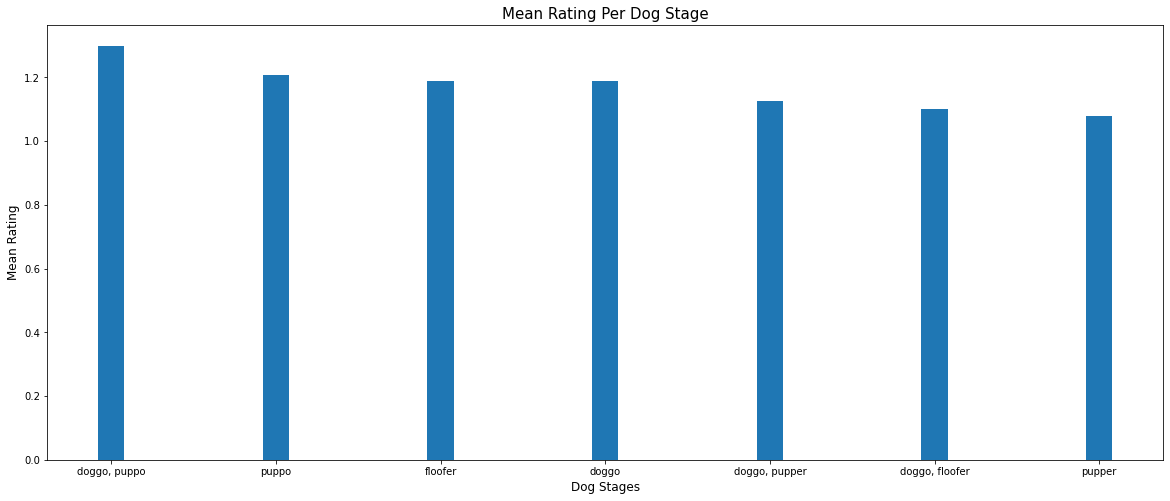

In [56]:
locations = np.arange(len(rating_means))

plt.subplots(figsize=(20, 8))

plt.bar(locations *5 , rating_means)

plt.xticks(locations * 5, rating_means.index)

plt.xlabel('Dog Stages', fontsize=12)

plt.ylabel('Mean Rating', fontsize=12)

plt.title('Mean Rating Per Dog Stage', fontsize=15);

In [57]:
retweet_count_means = gb_dog_stage.retweet_count.mean().sort_values(ascending = False)
retweet_count_means

dog_stage
doggo, puppo      19196.000000
doggo              7799.600000
puppo              6359.250000
doggo, pupper      5389.090909
floofer            4155.888889
doggo, floofer     3433.000000
pupper             2910.734440
Name: retweet_count, dtype: float64

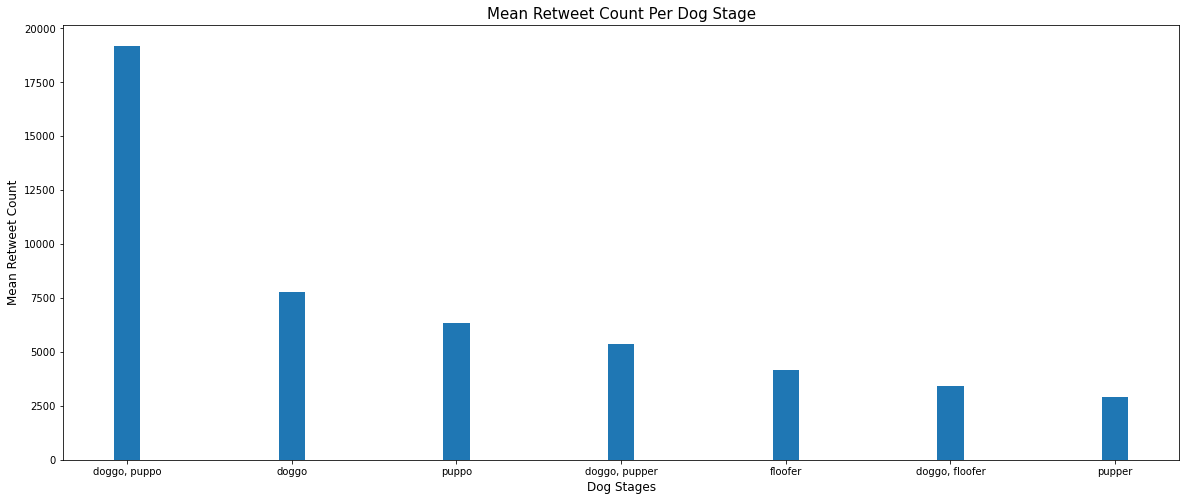

In [58]:
locations = np.arange(len(retweet_count_means))

plt.subplots(figsize=(20, 8))

plt.bar(locations *5 , retweet_count_means)

plt.xticks(locations * 5, retweet_count_means.index)

plt.xlabel('Dog Stages', fontsize=12)

plt.ylabel('Mean Retweet Count', fontsize=12)

plt.title('Mean Retweet Count Per Dog Stage', fontsize=15);

In [59]:
mean_favorite_count = gb_dog_stage.favorite_count.mean().sort_values(ascending = False)
mean_favorite_count

dog_stage
doggo, puppo      47844.000000
puppo             17761.392857
doggo, floofer    17169.000000
doggo             16254.175000
floofer           11064.444444
doggo, pupper     10339.272727
pupper             6648.045643
Name: favorite_count, dtype: float64

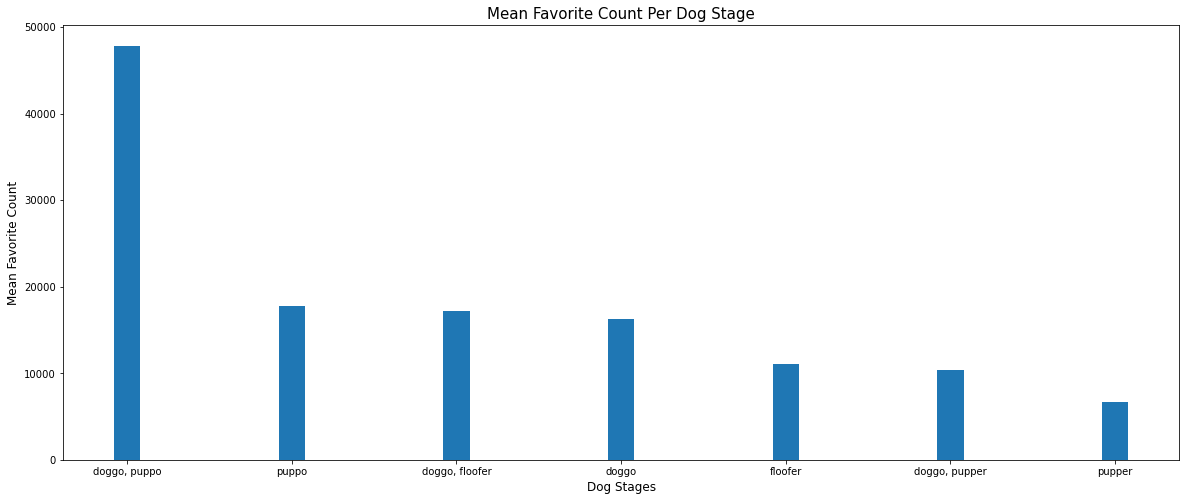

In [60]:
locations = np.arange(len(mean_favorite_count))

plt.subplots(figsize=(20, 8))

plt.bar(locations *5 , mean_favorite_count)

plt.xticks(locations * 5, mean_favorite_count.index)

plt.xlabel('Dog Stages', fontsize=12)

plt.ylabel('Mean Favorite Count', fontsize=12)

plt.title('Mean Favorite Count Per Dog Stage', fontsize=15);

# Findings
---

* The dog stage `doggo, puppo` has the highest mean rating of **1.3** followed by **puppo** then **floofer**.
* The dog stage `doggo, puppo` has the highest mean retweet count of **19196.0**, followed by `doggo` with a retweet count of **7799.6**.
* The dog stage `doggo, puppo` has the highest mean favorite count of **47844.0**, followed by `puppo` with about **17761.4** mean favorite count.

# Conclusions
---

According to my analysis, the dog stage `doggo, puppo` was the most popular according to mean rating, mean retweet count and mean favorite count.

# Resources
---

All of the code and datasets for this project are included on a [Github Repository](https://github.com/AbdulrahmanAlobaidy/DAND-project-4) dedicated for this project, including this Notebook in its `ipynb` format and HTML as well as any other relevant files.